<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Crie um classificador do tipo regressão linear por método exato, mínimos quadrados (ver slide 18 L06)

O objeto final deve conter os métodos fit(), predict() e score()

A base de dados deve ser separada em base de treino e teste. A base de treino deve ter 66% dos dados e a base de teste deve ter 33% dos dados.

Deve ser plotado o scatterplot dos pontos e a reta de decisão obtida

A acurácia final deve ser medida na base de treino e na base de teste

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'])

In [3]:
class LinearRegressor():
    def fit(self, X_train, y_train):
        X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)

    def predict(self, X):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        return X_.dot(self.weights)

    def MSE(self, y, pred):
        return np.sum(np.square(y - pred)) / y.shape[0]

lr = LinearRegressor()
lr.fit(X_train, y_train)


In [4]:
pred = lr.predict(X_train)
pred, y_train.to_numpy()

(array([ 0.97748984,  1.05834967, -0.01946658,  0.88119722,  1.05066278,
         0.04852275,  0.25505305, -0.09258051,  0.93512345, -0.09383214,
         0.95049722, -0.04383789,  1.09302917,  0.94281033,  0.07545635,
        -0.03358871,  0.12163667, -0.15544525,  0.90818985,  0.18193912,
         1.10071606,  0.85807755]),
 array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]))

In [5]:
lr.MSE(y_train, pred)

0.011084402369677995

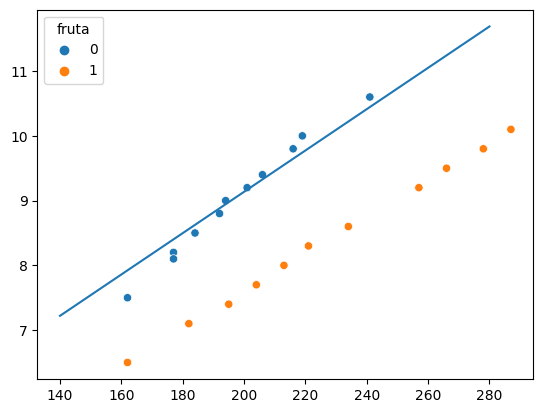

In [6]:
import seaborn as sns

line = lambda x: (lr.weights[1]*x+lr.weights[0])/-lr.weights[2] 

X = X_train.to_numpy()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_train)
plt.plot([140, 280], [line(140), line(280)])

In [7]:
from sklearn.model_selection import ShuffleSplit
import warnings

warnings.filterwarnings('ignore')

rs = ShuffleSplit(n_splits=5, test_size=0.33, random_state=1)

train_score = np.array([])
test_score = np.array([])

for i,(train_data, test_data)in enumerate(rs.split(df.drop(columns=['fruta']))):
    print(f'Iteração {i+1}')
    train_data_i = df.query(' index in @train_data')
    X_train_i = train_data_i.drop(columns=['fruta'])
    y_train_i = train_data_i['fruta']

    y_train_i = y_train_i[:,np.newaxis]

    test_data_i = df.query('index in @test_data')
    X_test_i = test_data_i.drop(columns=['fruta'])
    y_test_i = test_data_i['fruta']

    y_test_i = y_test_i[:,np.newaxis]

    lr = LinearRegressor()

    lr.fit(X_train_i, y_train_i)

    y_pred_train_i = lr.predict(X_train_i)
    y_pred_test_i = lr.predict(X_test_i)

    train_score_i = lr.MSE(y_pred_train_i, y_train_i)
    test_score_i = lr.MSE(y_pred_test_i, y_test_i)

    train_score = np.append(train_score, train_score_i)
    test_score = np.append(test_score, test_score_i)

    print(f'MSE na base de treino: {train_score_i}')
    print(f'MSE na base de teste: {test_score_i}')

print(f'\nMSE médio:\n\tTeste: {train_score.mean()}\n\tTreino: {test_score.mean()}')
print(f'STD:\n\tTeste: {train_score.std()}\n\tTreino: {test_score.std()}')

Iteração 1
MSE na base de treino: 0.018220876659026046
MSE na base de teste: 0.016523873018584267
Iteração 2
MSE na base de treino: 0.01358213507902235
MSE na base de teste: 0.024498406380254363
Iteração 3
MSE na base de treino: 0.014204734153338283
MSE na base de teste: 0.038468627280451806
Iteração 4
MSE na base de treino: 0.015946049888723893
MSE na base de teste: 0.01794345430212816
Iteração 5
MSE na base de treino: 0.011717017095848239
MSE na base de teste: 0.02895494174519956

MSE médio:
	Teste: 0.01473416257519176
	Treino: 0.025277860545323626
STD:
	Teste: 0.002206194670124473
	Treino: 0.007981862120646058
